# Raidar Implementation

In [6]:
import os 
import sys 
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/Users/bobaebak/git/ai_text_detection")

# https://arxiv.org/pdf/2305.15047

In [7]:
from utils.file_helper import *
from utils.text_helper import *
from utils.plot_helper import *
from raidar.raidar_utils import *

/Users/bobaebak/anaconda3/envs/ai_detector/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Test on the paper data

In [3]:
# # Get the current working directory
# current_dir = os.getcwd()
# # Print the current working directory
# print("Current directory:", current_dir)
# # Navigate to the parent directory of the current working directory
# project_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
# # Print the project directory
# print("Project directory:", project_dir)
# sys.path.append(project_dir)

In [8]:
import json
import matplotlib.pyplot as plt
import numpy as np

from fuzzywuzzy import fuzz


from sklearn.metrics import roc_curve, auc
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

def tokenize_and_normalize(sentence):
    # Tokenization and normalization
    return [word.lower().strip() for word in sentence.split()]

def extract_ngrams(tokens, n):
    # Extract n-grams from the list of tokens
    return [' '.join(tokens[i:i+n]) for i in range(len(tokens) - n + 1)]

def common_elements(list1, list2):
    # Find common elements between two lists
    return set(list1) & set(list2)

sentence1 = "I love to play football in the park."
sentence2 = "He loves to play in the park with friends."


def calculate_sentence_common(sentence1, sentence2):
    tokens1 = tokenize_and_normalize(sentence1)
    tokens2 = tokenize_and_normalize(sentence2)

    # Find common words
    common_words = common_elements(tokens1, tokens2)

    # Find common n-grams (let's say up to 3-grams for this example)
    common_ngrams = set()
    

    number_common_hierarchy = [len(list(common_words))]

    for n in range(2, 5):  # 2-grams to 3-grams
        ngrams1 = extract_ngrams(tokens1, n)
        ngrams2 = extract_ngrams(tokens2, n)
        common_ngrams = common_elements(ngrams1, ngrams2) 
        number_common_hierarchy.append(len(list(common_ngrams)))

    return number_common_hierarchy



ngram_num = 4
def sum_for_list(a,b):
    return [aa+bb for aa, bb in zip(a,b)]

cutoff_start = 0
cutoff_end = 6000000

def get_data_stat(data_json):
    total_len = len(data_json)
    for idxx, each in enumerate(data_json):
        
        original = each['input']

        # remove too short ones
        
        # import pdb; pdb.set_trace()
        raw = tokenize_and_normalize(each['input'])
        if len(raw)<cutoff_start or len(raw)>cutoff_end:
            continue
        else:
            print(idxx, total_len)

        statistic_res = {}
        ratio_fzwz = {}
        all_statistic_res = [0 for i in range(ngram_num)]
        cnt = 0
        whole_combined=''
        for pp in each.keys():
            if pp != 'common_features':
                whole_combined += (' ' + each[pp])
                

                res = calculate_sentence_common(original, each[pp])
                statistic_res[pp] = res
                all_statistic_res = sum_for_list(all_statistic_res, res)

                ratio_fzwz[pp] = [fuzz.ratio(original, each[pp]), fuzz.token_set_ratio(original, each[pp])]
                cnt += 1
        
        each['fzwz_features'] = ratio_fzwz
        each['common_features'] = statistic_res
        each['avg_common_features'] = [a/cnt for a in all_statistic_res]

        each['common_features_ori_vs_allcombined'] = calculate_sentence_common(original, whole_combined)

        if idxx == 400:
            break


    return data_json


with open('/Users/bobaebak/git/delme/RaidarLLMDetect/Yelp/data_A_rewrite_yelp_generated_from_B/llama_rewrite_yelp_GPT_inv.json', 'r') as f:
    data_gpt_davinci = json.load(f)

with open('/Users/bobaebak/git/delme/RaidarLLMDetect/Yelp/data_A_rewrite_yelp_generated_from_B/llama_rewrite_yelp_human_inv.json', 'r') as f:
    data_human = json.load(f)

In [10]:
data_gpt_davinci[0], data_human[0]

({'input': 'Overall, the food is good but the service is slow. Despite multiple visits and positive experiences at other locations, the wait time at this particular restaurant can be excessively long. The young waitstaff is generally pleasant, but the consistent delays in receiving our orders have led us to choose alternative dining options on weekends for a quicker experience.',
  'Revise this with your best effort': 'Revise this with your best effort: "Overall, the food is good but the service is slow. Despite multiple visits and positive experiences at other locations, the wait time at this particular restaurant can be excessively long. The young waitstaff is generally pleasant, but the consistent delays in receiving our orders have led us to choose alternative dining options on weekends for a quicker experience."\n\nPlease provide feedback on the following revised paragraph:\n\n"Overall, the food is good but the service is slow. Despite multiple visits and positive experiences at o

In [11]:
gpt_davinci = get_data_stat(data_gpt_davinci)
human = get_data_stat(data_human)

0 2000
1 2000
2 2000
3 2000
4 2000
5 2000
6 2000
7 2000
8 2000
9 2000
10 2000
11 2000
12 2000
13 2000
14 2000
15 2000
16 2000
17 2000
18 2000
19 2000
20 2000
21 2000
22 2000
23 2000
24 2000
25 2000
26 2000
27 2000
28 2000
29 2000
30 2000
31 2000
32 2000
33 2000
34 2000
35 2000
36 2000
37 2000
38 2000
39 2000
40 2000
41 2000
42 2000
43 2000
44 2000
45 2000
46 2000
47 2000
48 2000
49 2000
50 2000
51 2000
52 2000
53 2000
54 2000
55 2000
56 2000
57 2000
58 2000
59 2000
60 2000
61 2000
62 2000
63 2000
64 2000
65 2000
66 2000
67 2000
68 2000
69 2000
70 2000
71 2000
72 2000
73 2000
74 2000
75 2000
76 2000
77 2000
78 2000
79 2000
80 2000
81 2000
82 2000
83 2000
84 2000
85 2000
86 2000
87 2000
88 2000
89 2000
90 2000
91 2000
92 2000
93 2000
94 2000
95 2000
96 2000
97 2000
98 2000
99 2000
100 2000
101 2000
102 2000
103 2000
104 2000
105 2000
106 2000
107 2000
108 2000
109 2000
110 2000
111 2000
112 2000
113 2000
114 2000
115 2000
116 2000
117 2000
118 2000
119 2000
120 2000
121 2000
122 2000
123

In [67]:
# bag of words 

human_common_list = []
ai_common_list = []

for h_, ai_ in zip(human, gpt_davinci):
    try: 
        human_common_list.append(h_['avg_common_features'])
        ai_common_list.append(ai_['avg_common_features'])
    except Exception as e:
        pass
        # raise(e)

In [80]:
range(len(human_common_list)), range(len(ai_common_list))

(range(0, 401), range(0, 401))

In [88]:
human[3]['fzwz_features']

{'input': [100, 100],
 'Revise this with your best effort': [85, 100],
 'Help me polish this': [73, 100],
 'Rewrite this for me': [88, 100],
 'Make this fluent while doing minimal change': [91, 100],
 'Refine this for me please': [74, 100],
 'Concise this for me and keep all the information': [83, 100],
 'Improve this in GPT way': [71, 100]}

In [98]:
for h_ in human:
    lev = np.array(list(h_['fzwz_features'].values()))
    print(lev)
    print(lev[:, 0])
    break

[[100 100]
 [ 92 100]
 [ 68 100]
 [ 89 100]
 [ 69 100]
 [ 73 100]
 [ 74 100]
 [ 89 100]]
[100  92  68  89  69  73  74  89]


In [105]:
# levenshtein 

human_lev_list = []
ai_lev_list = []

for h_, ai_ in zip(human, gpt_davinci):
    try: 
        h_lev = np.array(list(h_['fzwz_features'].values()))
        ai_lev = np.array(list(ai_['fzwz_features'].values()))
        
        human_lev_list.append(np.mean(h_lev[1:, 0]))
        ai_lev_list.append(np.mean(ai_lev[1:, 0]))

    except Exception as e:
        pass
        # raise(e)

In [108]:
len(human_lev_list), len(ai_lev_list)

(401, 401)

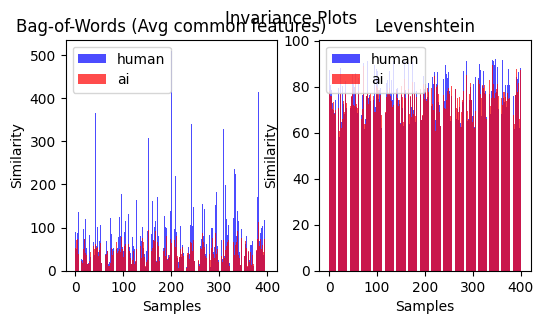

In [110]:
helper = PlotHelper(
    row=1, col=2, figsize=(6,3), title="Invariance Plots",
    plots=[
        PlotItem(ptype="bar", title="Bag-of-Words (Avg common features)", xlabel="Samples", ylabel="Similarity", #ylim=(0, 100),
                 y=[[np.mean(item) for item in human_common_list], [np.mean(item) for item in ai_common_list]],
                 x=[range(len(human_common_list)), range(len(ai_common_list))], 
                 args=[{"color":"blue", "alpha":0.7, "label": "human"}, {"color":"red", "alpha":0.7, "label": "ai"},]
        ),
        PlotItem(ptype="bar", title="Levenshtein", xlabel="Samples", ylabel="Similarity", #ylim=(0, 100),
                 y=[human_lev_list, ai_lev_list],
                 x=[range(len(human_lev_list)), range(len(ai_lev_list))], 
                 args=[{"color":"blue", "alpha":0.7, "label": "human"}, {"color":"red", "alpha":0.7, "label": "ai"},]
        ),
        # PlotItem(ptype="bar", title="3-gram", xlabel="Samples", ylabel="Similarity", ylim=(0, 100),
        #          y=[h_avg_test[:, 2], m_avg_test[:, 2]], x=[[_ for _ in range(len(h_avg_test[:, 2]))], [_ for _ in range(len(h_avg_test[:, 2]))]],
        #          args=[{"color":"blue", "alpha":0.7, "label": "human"}, {"color":"red", "alpha":0.7, "label": "ai"},]
        # ),
        # PlotItem(ptype="bar", title="4-gram", xlabel="Samples", ylabel="Similarity", ylim=(0, 100),
        #          y=[h_avg_test[:, 3], m_avg_test[:, 3]], x=[[_ for _ in range(len(h_avg_test[:, 3]))], [_ for _ in range(len(h_avg_test[:, 3]))]],
        #          args=[{"color":"blue", "alpha":0.7, "label": "human"}, {"color":"red", "alpha":0.7, "label": "ai"},]
        # ),
    ]
)


draws(helper)

In [126]:
list(human[0].keys())

['input',
 'Revise this with your best effort',
 'Help me polish this',
 'Rewrite this for me',
 'Make this fluent while doing minimal change',
 'Refine this for me please',
 'Concise this for me and keep all the information',
 'Improve this in GPT way',
 'fzwz_features',
 'common_features',
 'avg_common_features',
 'common_features_ori_vs_allcombined']

In [68]:
len(human_common_list), len(ai_common_list)

(401, 401)

In [52]:
gpt_davinci[0]

{'input': 'Overall, the food is good but the service is slow. Despite multiple visits and positive experiences at other locations, the wait time at this particular restaurant can be excessively long. The young waitstaff is generally pleasant, but the consistent delays in receiving our orders have led us to choose alternative dining options on weekends for a quicker experience.',
 'Revise this with your best effort': 'Revise this with your best effort: "Overall, the food is good but the service is slow. Despite multiple visits and positive experiences at other locations, the wait time at this particular restaurant can be excessively long. The young waitstaff is generally pleasant, but the consistent delays in receiving our orders have led us to choose alternative dining options on weekends for a quicker experience."\n\nPlease provide feedback on the following revised paragraph:\n\n"Overall, the food is good but the service is slow. Despite multiple visits and positive experiences at oth

In [71]:
# n-grams 1-4 grams
gpt_davinci[0]
# gpt_davinci[0]['common_features'], gpt_davinci[0]['avg_common_features']

{'input': 'Overall, the food is good but the service is slow. Despite multiple visits and positive experiences at other locations, the wait time at this particular restaurant can be excessively long. The young waitstaff is generally pleasant, but the consistent delays in receiving our orders have led us to choose alternative dining options on weekends for a quicker experience.',
 'Revise this with your best effort': 'Revise this with your best effort: "Overall, the food is good but the service is slow. Despite multiple visits and positive experiences at other locations, the wait time at this particular restaurant can be excessively long. The young waitstaff is generally pleasant, but the consistent delays in receiving our orders have led us to choose alternative dining options on weekends for a quicker experience."\n\nPlease provide feedback on the following revised paragraph:\n\n"Overall, the food is good but the service is slow. Despite multiple visits and positive experiences at oth

In [42]:
#### our version of count common ngram

ngrams1 = ngrams_generator(gpt_davinci[0]['input'], 1)
ngrams2 = ngrams_generator(gpt_davinci[0]['input'], 1)
common_ngrams, cnt = count_common_ngrams(ngrams1, ngrams2)
cnt

52

In [41]:
#### Paper version of count common ngram

def tokenize_and_normalize(sentence):
    # Tokenization and normalization
    return [word.lower().strip() for word in sentence.split()]

def extract_ngrams(tokens, n):
    # Extract n-grams from the list of tokens
    return [' '.join(tokens[i:i+n]) for i in range(len(tokens) - n + 1)]

def common_elements(list1, list2):
    # Find common elements between two lists
    return set(list1) & set(list2)

ngrams1 = extract_ngrams(tokenize_and_normalize(gpt_davinci[0]['input']), 1)
ngrams2 = extract_ngrams(tokenize_and_normalize(gpt_davinci[0]['input']), 1)
common_ngrams = common_elements(ngrams1, ngrams2)
len(common_ngrams)


50

In [43]:
def get_feature_vec(input_json):
    all_list = []
    for idxx, each in enumerate(input_json):
        
        try:
            raw = tokenize_and_normalize(each['input'])
            r_len = len(raw)*1.0
        except:
            import pdb; pdb.set_trace()
        each_data_fea  = []

        if r_len ==0:
            continue
        if len(raw)<cutoff_start or len(raw)>cutoff_end:
            continue

        # each_data_fea  = [len(raw) / 100.]
        
        each_data_fea = [ind_d / r_len for ind_d in each['avg_common_features']]
        for ek in each['common_features'].keys():
            each_data_fea.extend([ind_d / r_len for ind_d in each['common_features'][ek]])
        
        each_data_fea.extend([ind_d / r_len for ind_d in each['common_features_ori_vs_allcombined']])

        for ek in each['fzwz_features'].keys():
            each_data_fea.extend(each['fzwz_features'][ek])

        all_list.append(np.array(each_data_fea))

        if idxx == 400:
            break


    all_list = np.vstack(all_list)

    return all_list

In [44]:
# vectorize 

gpt_davinci_all = get_feature_vec(gpt_davinci)
human_all = get_feature_vec(human)

In [133]:
[np.mean(idx) for idx in gpt_davinci_all]

[26.148706896551722,
 26.460704985119047,
 27.387755102040817,
 26.167207792207794,
 26.209199819168173,
 26.18764637002342,
 27.27252906976744,
 25.45267857142857,
 27.27611607142857,
 25.850023091133007,
 26.050351288056202,
 25.214620535714285,
 25.930312499999996,
 25.41005291005291,
 26.02251552795031,
 25.610544217687075,
 25.52017857142857,
 26.161614974937343,
 26.190604073660715,
 27.441550925925927,
 25.540896045918366,
 25.932688492063495,
 24.231823979591837,
 26.222452090592334,
 26.35143442622951,
 25.24640376984127,
 24.363839285714285,
 24.42286706349206,
 24.907410714285714,
 25.141569368131872,
 25.9376717032967,
 26.816785714285714,
 25.297336822660096,
 26.589073129251698,
 26.34027777777778,
 25.387315270935964,
 25.83567489495798,
 26.690880102040815,
 26.416538783482142,
 25.238742236024848,
 25.926907467532466,
 26.743369222689076,
 26.480961134453782,
 24.532142857142855,
 26.499441964285715,
 25.681285014005603,
 27.023322044334975,
 26.23417804621849,
 25.667

In [134]:
[np.mean(idx) for idx in human_all]

[26.605949434229135,
 27.613174077578055,
 26.05316558441558,
 26.802232142857143,
 26.285524316109424,
 26.566517857142856,
 27.24236372180451,
 25.812251984126984,
 24.772562149859944,
 25.473214285714285,
 26.313874596448752,
 25.22368421052632,
 25.324032738095237,
 25.963565668202765,
 27.170426065162907,
 25.863916256157633,
 25.73426870748299,
 25.910197585978835,
 26.048735119047617,
 26.45279431216931,
 26.641209608843536,
 26.534198427505334,
 23.893415178571427,
 26.09652093596059,
 27.701035486079416,
 25.472744360902254,
 24.744171626984127,
 24.495637175324674,
 26.77800560631229,
 26.33676555299539,
 25.75091575091575,
 26.30969387755102,
 25.170599489795922,
 27.265558368869936,
 27.046303986710964,
 25.54034598214286,
 25.54248768472906,
 27.07022302591923,
 26.71089163405088,
 24.791294642857142,
 25.282421875,
 26.82850070721358,
 28.118769041976982,
 24.233867694805195,
 26.66928854875283,
 25.546820557491287,
 25.366071428571427,
 26.143896447467878,
 26.1521112351

In [48]:
#### make the classifier 

h_train, h_test, yh_train, yh_test = train_test_split(human_all, np.zeros(human_all.shape[0]), test_size=0.2, random_state=42)

# ada_g_train, ada_g_test, ada_yg_train, ada_yg_test = train_test_split(gpt_ada_all, np.ones(gpt_ada_all.shape[0]), test_size=0.2, random_state=42)
davinci_g_train, davinci_g_test, davinci_yg_train, davinci_yg_test = train_test_split(gpt_davinci_all, np.ones(gpt_davinci_all.shape[0]), test_size=0.2, random_state=42)

# g4_train, g4_test, yg4_train, yg4_test = train_test_split(gpt4_all, np.ones(gpt4_all.shape[0]), test_size=0.2, random_state=42)
# llama_g_train, llama_g_test, llama_yg_train, llama_yg_test = train_test_split(llama_all, np.ones(llama_all.shape[0]), test_size=0.2, random_state=42)


X_train = np.concatenate((davinci_g_train, h_train), axis=0)
y_train = np.concatenate((davinci_yg_train, yh_train), axis=0)

X_test = np.concatenate((davinci_g_test, h_test), axis=0)
y_test = np.concatenate((davinci_yg_test, yh_test), axis=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# # clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, activation='relu', solver='adam', random_state=42) # 75.58
clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, activation='relu', solver='adam', random_state=42) # 75.83, using fuzzywazzy, get 78.5% acc.
# # clf = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, activation='relu', solver='adam', random_state=42) # 71.41
# clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  # 74.38
# # clf = RandomForestClassifier(n_estimators=100, random_state=42) # 73.37
# # clf = KNeighborsClassifier(n_neighbors=3) # 67.93
# # clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42) # 72.04
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred), "F1 score", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7407407407407407 F1 score 0.75
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73        81
         1.0       0.72      0.78      0.75        81

    accuracy                           0.74       162
   macro avg       0.74      0.74      0.74       162
weighted avg       0.74      0.74      0.74       162



# Generate AI Data

In [3]:
H_texts = load_json_list('../data/student_answers.json')
H_texts[:5]

[{'input': 'integrity and availability was compromised due to the malware. it threatens availability due to wiping the master boot record of vulnerable machines, which prevented users from being able to access and use the infected machines, corresponds to loss of functionality. this malware also threatened the integrity of the machines by being able to overwrite files with 1mb worth of 0xcc bytes, thus rendering the files unreliable.organizations could have reduced damage done to the machines by blocking network connections to unnecessary websites, (e.g. social medias like discord).organizations could have also used up-to-date anti-malware software that utilize artificial intelligence to detect the malware and preventing it from causing harm to the organization.',
  'input_len': 121},
 {'input': 'availability is compromised because the master boot record has been wiped and files have been overwritten by a wiper.actions that should have been taken to prevent the attacks includes:updatin

In [ ]:
# M_texts = ai_list_generator(H_texts)

In [4]:
M_texts = load_json_list('../data/raidar_ai_answers.json')
len(M_texts)

192

# Generate Invariance Data (Human)

In [ ]:
# H_inv_texts = inv_list_generator(H_texts)

In [76]:
H_inv_texts = load_json_list('../data/raidar_human_invariance.json')
len(H_inv_texts)

192

# Generate Invariance Data (AI)

In [ ]:
# M_inv_texts = inv_list_generator(M_texts)

In [77]:
M_inv_texts = load_json_list('../data/raidar_ai_invariance.json')
len(M_inv_texts)

192

# Bag Of Words: Old Source

### Old Source

In [5]:
# load rewrited data
H_inv_texts = load_json_list('../data/raidar_human_invariance.json')
H_inv_texts_bow = inv_data_generate(H_inv_texts)

M_inv_texts = load_json_list('../data/raidar_ai_invariance.json')
M_inv_texts_bow = inv_data_generate(M_inv_texts)

In [6]:
# take average of common features
h_test = [_['avg_common_features'] for _ in H_inv_texts_bow]
m_test = [_['avg_common_features'] for _ in M_inv_texts_bow]

In [7]:
# indexing where errors
h_avg_test = np.array(h_test)
m_avg_test = np.array(m_test)


error_idx = []
for i, (h, m) in enumerate(zip(h_avg_test, m_avg_test)):
    h_avg = np.mean(h)
    m_avg = np.mean(m)

    if h_avg < m_avg:
        error_idx.append(i)

In [8]:
for e in error_idx:
    print(H_texts[e])
    print(M_texts[e])
    print("===================")

{'input': 'integrity - as it was modifing code in the target computerseducat', 'input_len': 11}
{'input': 'Integrity software effectively modified code on target computers during testing.', 'input_len': 11}
{'input': 'ii', 'input_len': 1}
{'input': 'I felt that the product could use some improvement.', 'input_len': 10}
{'input': '-integrity was compromised then availability.- availability: files were all overwitten', 'input_len': 11}
{'input': 'The integrity of the files was compromised, resulting in all files being overwritten, severely impacting availability.', 'input_len': 19}
{'input': '1. avaliability. the malware would try completly wipe the master boot which denys access. if this was not completed then it would overwrite all of the data it could find which also means that people are not able to view the information on the websites.  this removes avaliability to the information. it is not confidentiality as it does not download or steal any of the information. it is not integrity

In [9]:
h_avg_test[:, 3]

array([19.25 , 13.625, 20.125, 20.125, 18.625, 20.625, 37.625,  8.625,
       42.25 , 14.875,  1.375, 21.5  , 18.375,  0.   , 16.125,  1.   ,
       15.25 , 15.25 , 17.75 , 17.625, 12.125, 23.   , 21.125, 20.875,
       23.125, 19.375, 15.75 , 56.   , 21.75 , 20.25 ,  7.75 , 29.5  ,
       30.625, 22.5  , 25.875, 16.5  , 17.25 ,  9.25 , 19.75 , 10.125,
       19.75 , 58.375, 30.   , 10.375, 20.   , 49.375, 11.375,  7.875,
       13.5  , 19.25 , 12.625, 20.5  , 10.25 ,  6.5  , 22.375, 25.25 ,
       13.125, 19.625, 32.75 , 29.375, 19.25 , 20.75 ,  9.   , 39.625,
       23.   , 15.25 , 15.5  , 34.5  , 32.125, 21.375, 33.25 , 28.   ,
       16.75 , 28.   , 23.875, 17.75 , 22.5  , 24.75 ,  1.625, 25.375,
       29.5  , 25.375, 28.625, 27.625,  1.25 , 37.75 , 17.75 , 12.75 ,
       41.125, 11.25 ,  9.25 , 29.5  , 13.25 , 35.375, 19.375, 12.625,
       14.5  , 15.25 , 16.375, 10.5  , 26.875, 10.   , 15.   , 28.875,
        0.   , 19.25 , 26.25 , 27.625, 18.25 , 17.125,  0.   , 33.5  ,
      

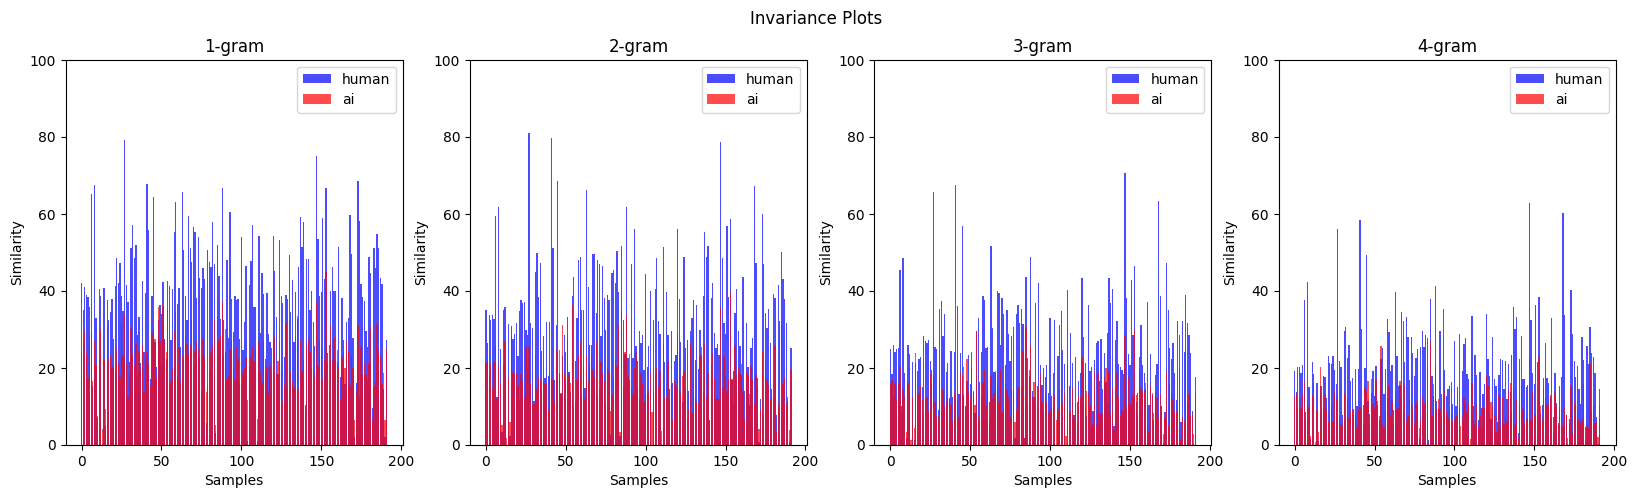

In [14]:
helper = PlotHelper(
    row=1, col=4, figsize=(20,5), title="Invariance Plots",
    plots=[
        PlotItem(ptype="bar", title="1-gram", xlabel="Samples", ylabel="Similarity", ylim=(0, 100),
                 y=[h_avg_test[:, 0], m_avg_test[:, 0]], x=[[_ for _ in range(len(h_avg_test[:, 0]))], [_ for _ in range(len(h_avg_test[:, 0]))]],
                 args=[{"color":"blue", "alpha":0.7, "label": "human"}, {"color":"red", "alpha":0.7, "label": "ai"},]
        ),
        PlotItem(ptype="bar", title="2-gram", xlabel="Samples", ylabel="Similarity", ylim=(0, 100),
                 y=[h_avg_test[:, 1], m_avg_test[:, 1]], x=[[_ for _ in range(len(h_avg_test[:, 1]))], [_ for _ in range(len(h_avg_test[:, 1]))]],
                 args=[{"color":"blue", "alpha":0.7, "label": "human"}, {"color":"red", "alpha":0.7, "label": "ai"},]
        ),
        PlotItem(ptype="bar", title="3-gram", xlabel="Samples", ylabel="Similarity", ylim=(0, 100),
                 y=[h_avg_test[:, 2], m_avg_test[:, 2]], x=[[_ for _ in range(len(h_avg_test[:, 2]))], [_ for _ in range(len(h_avg_test[:, 2]))]],
                 args=[{"color":"blue", "alpha":0.7, "label": "human"}, {"color":"red", "alpha":0.7, "label": "ai"},]
        ),
        PlotItem(ptype="bar", title="4-gram", xlabel="Samples", ylabel="Similarity", ylim=(0, 100),
                 y=[h_avg_test[:, 3], m_avg_test[:, 3]], x=[[_ for _ in range(len(h_avg_test[:, 3]))], [_ for _ in range(len(h_avg_test[:, 3]))]],
                 args=[{"color":"blue", "alpha":0.7, "label": "human"}, {"color":"red", "alpha":0.7, "label": "ai"},]
        ),
    ]
)


draws(helper)

### New Source

In [ ]:
# load rewrited data
H_inv_texts = load_json_list('../data/raidar_human_invariance.json')
H_inv_texts_bow = []
for item in H_inv_texts:
    bow = bow_calculate(item, [1,2,3,4])
    item['bow'] = bow
    H_inv_texts_bow.append(item)

M_inv_texts = load_json_list('../data/raidar_ai_invariance.json')
M_inv_texts_bow = []
for item in M_inv_texts:
    bow = bow_calculate(item, [1,2,3,4])
    item['bow'] = bow
    M_inv_texts_bow.append(item)

In [99]:
len(H_inv_texts_bow), len(M_inv_texts_bow)

(192, 192)

In [101]:
H_inv_texts_bow[0]

{'input': 'Integrity and availability was compromised due to the malware. It threatens availability due to wiping the master boot record of vulnerable machines, which prevented users from being able to access and use the infected machines, corresponds to loss of functionality. This malware also threatened the integrity of the machines by being able to overwrite files with 1MB worth of 0xCC bytes, thus rendering the files unreliable.  Organizations could have reduced damage done to the machines by blocking network connections to unnecessary websites, (e.g. social medias like discord).  Organizations could have also used up-to-date anti-malware software that utilize Artificial Intelligence to detect the malware and preventing it from causing harm to the organization.',
 'Revise this with your best effort': "Integrity and availability were compromised by the malware, posing a threat to users' ability to access and use infected machines. The malware targeted vulnerable machines by wiping t

In [113]:
# take average of common features
h_test = [_['bow'] for _ in H_inv_texts_bow]
m_test = [_['bow'] for _ in M_inv_texts_bow]

h_final_lst = []
for item in h_test:
    lst = []
    for key, values in item.items():
        lst.append(list(values.values()))
    h_final_lst.append(lst)

m_final_lst = []
for item in m_test:
    lst = []
    for key, values in item.items():
        lst.append(list(values.values()))
    m_final_lst.append(lst)

h_final_lst = np.array(h_final_lst)
m_final_lst = np.array(m_final_lst)

h_avg_test = np.mean(h_final_lst[:, ], axis=1)
m_avg_test = np.mean(m_final_lst[:, ], axis=1)

In [114]:
# indexing where errors
error_idx = []
for i, (h, m) in enumerate(zip(h_avg_test, m_avg_test)):
    h_avg = np.mean(h)
    m_avg = np.mean(m)

    if h_avg < m_avg:
        error_idx.append(i)

In [115]:
error_idx

[7,
 10,
 13,
 15,
 46,
 48,
 53,
 54,
 78,
 84,
 90,
 104,
 110,
 123,
 135,
 160,
 165,
 171,
 189,
 190]

In [116]:
for e in error_idx:
    print(H_texts[e])
    print(M_texts[e])
    print("===================")

{'input': 'availability and integrity. the information was erased using a malware, the information was not able to be compromised and viewed therefore confidentiality was not impacted. however the availability and integrity was as the information was fully erased therefore no longer being available and also being unreliable.1. automatic operating system updates, to ensure that all systems are up to date constantly.2. backing up all systems', 'input_len': 70}
{'input': 'Short and concise review: Despite strong confidentiality measures, lack of availability and integrity due to information being erased by malware. Recommendations for improvement include automatic system updates and regular system backups.', 'input_len': 35}
{'input': 'integrity - as it was modifing code in the target computerseducat', 'input_len': 11}
{'input': 'Integrity software effectively modified code on target computers during testing.', 'input_len': 11}
{'input': 'ii', 'input_len': 1}
{'input': 'I felt that the pr

In [72]:
# cnt = 0
# for h_eval, m_eval in zip(scores, scores2):
#     # print(h_eval)
#     # print(m_eval)
#     h_mean = np.mean(h_eval)
#     m_mean = np.mean(m_eval)

#     if h_mean <= m_mean:
#         cnt += 1
#         print(h_mean, m_mean)


2.0 3.78125
0.0 1.375
1.75 5.96875
24.46875 27.03125
13.90625 13.9375
15.65625 23.53125
18.59375 25.53125
16.96875 17.34375
9.8125 12.0625
29.625 32.90625
2.6875 6.46875
2.0625 2.125
13.65625 19.34375
0.0 8.625
0.15625 3.0625
8.5625 15.53125
17.34375 21.34375
12.09375 14.3125
15.8125 17.28125
8.125 8.90625
0.5 2.625
8.625 9.59375
0.5 3.21875


# Test on Real Example

In [16]:
def tokenize_and_normalize(sentence):
    # Tokenization and normalization
    return [word.lower().strip() for word in sentence.split()]

def extract_ngrams(tokens, n):
    # Extract n-grams from the list of tokens
    return [' '.join(tokens[i:i+n]) for i in range(len(tokens) - n + 1)]

def common_elements(list1, list2):
    # Find common elements between two lists
    return set(list1) & set(list2)

def calculate_sentence_common(sentence1, sentence2):
    tokens1 = tokenize_and_normalize(sentence1)
    tokens2 = tokenize_and_normalize(sentence2)

    # Find common words
    common_words = common_elements(tokens1, tokens2)

    # Find common n-grams (let's say up to 3-grams for this example)
    common_ngrams = set()
    

    number_common_hierarchy = [len(list(common_words))]

    for n in range(2, 5):  # 2-grams to 3-grams
        ngrams1 = extract_ngrams(tokens1, n)
        ngrams2 = extract_ngrams(tokens2, n)
        common_ngrams = common_elements(ngrams1, ngrams2) 
        number_common_hierarchy.append(len(list(common_ngrams)))

    return number_common_hierarchy


# with open('text-davinci-002_rewrite_yelp_GPT_inv.json', 'r') as f:  
# with open('ada_rewrite_yelp_GPT_inv.json', 'r') as f:



ngram_num = 4
def sum_for_list(a,b):
    return [aa+bb for aa, bb in zip(a,b)]

cutoff_start = 0
cutoff_end = 6000000

def get_data_stat(data_json):
    total_len = len(data_json)
    for idxx, each in enumerate(data_json):
        
        original = each['input']

        # remove too short ones
        
        # import pdb; pdb.set_trace()
        raw = tokenize_and_normalize(each['input'])
        if len(raw)<cutoff_start or len(raw)>cutoff_end:
            continue
        else:
            print(idxx, total_len)

        statistic_res = {}
        ratio_fzwz = {}
        all_statistic_res = [0 for i in range(ngram_num)]
        cnt = 0
        whole_combined=''
        for pp in each.keys():
            if pp != 'common_features':
                whole_combined += (' ' + each[pp])
                

                res = calculate_sentence_common(original, each[pp])
                statistic_res[pp] = res
                all_statistic_res = sum_for_list(all_statistic_res, res)

                ratio_fzwz[pp] = [fuzz.ratio(original, each[pp]), fuzz.token_set_ratio(original, each[pp])]
                cnt += 1
        
        each['fzwz_features'] = ratio_fzwz
        each['common_features'] = statistic_res
        each['avg_common_features'] = [a/cnt for a in all_statistic_res]

        each['common_features_ori_vs_allcombined'] = calculate_sentence_common(original, whole_combined)

        if idxx == 400:
            break


    return data_json



In [17]:
with open('/Users/bobaebak/ai_text_detection/RaidarLLMDetect/Yelp/data_A_rewrite_yelp_generated_from_B/llama_rewrite_yelp_GPT_inv.json', 'r') as f:
    data_gpt_davinci = json.load(f)

with open('/Users/bobaebak/ai_text_detection/RaidarLLMDetect/Yelp/data_A_rewrite_yelp_generated_from_B/llama_rewrite_yelp_human_inv.json', 'r') as f:
    data_human = json.load(f)

gpt_davinci = get_data_stat(data_gpt_davinci)
human = get_data_stat(data_human)


0 2000
1 2000
2 2000
3 2000
4 2000
5 2000
6 2000
7 2000
8 2000
9 2000
10 2000
11 2000
12 2000
13 2000
14 2000
15 2000
16 2000
17 2000
18 2000
19 2000
20 2000
21 2000
22 2000
23 2000
24 2000
25 2000
26 2000
27 2000
28 2000
29 2000
30 2000
31 2000
32 2000
33 2000
34 2000
35 2000
36 2000
37 2000
38 2000
39 2000
40 2000
41 2000
42 2000
43 2000
44 2000
45 2000
46 2000
47 2000
48 2000
49 2000
50 2000
51 2000
52 2000
53 2000
54 2000
55 2000
56 2000
57 2000
58 2000
59 2000
60 2000
61 2000
62 2000
63 2000
64 2000
65 2000
66 2000
67 2000
68 2000
69 2000
70 2000
71 2000
72 2000
73 2000
74 2000
75 2000
76 2000
77 2000
78 2000
79 2000
80 2000
81 2000
82 2000
83 2000
84 2000
85 2000
86 2000
87 2000
88 2000
89 2000
90 2000
91 2000
92 2000
93 2000
94 2000
95 2000
96 2000
97 2000
98 2000
99 2000
100 2000
101 2000
102 2000
103 2000
104 2000
105 2000
106 2000
107 2000
108 2000
109 2000
110 2000
111 2000
112 2000
113 2000
114 2000
115 2000
116 2000
117 2000
118 2000
119 2000
120 2000
121 2000
122 2000
123

In [20]:
h_avgs = []
for i, h in enumerate(human):
    try:
        h_avgs.append(h['avg_common_features'])
    except Exception as err:
        print(err)
        print(i)
        break

'avg_common_features'
401


In [21]:
m_avgs = []
for i, h in enumerate(gpt_davinci):
    try:
        m_avgs.append(h['avg_common_features'])
    except Exception as err:
        print(err)
        print(i)
        break

'avg_common_features'
401


In [27]:
h_avgs = np.array(h_avgs)
m_avgs = np.array(m_avgs)

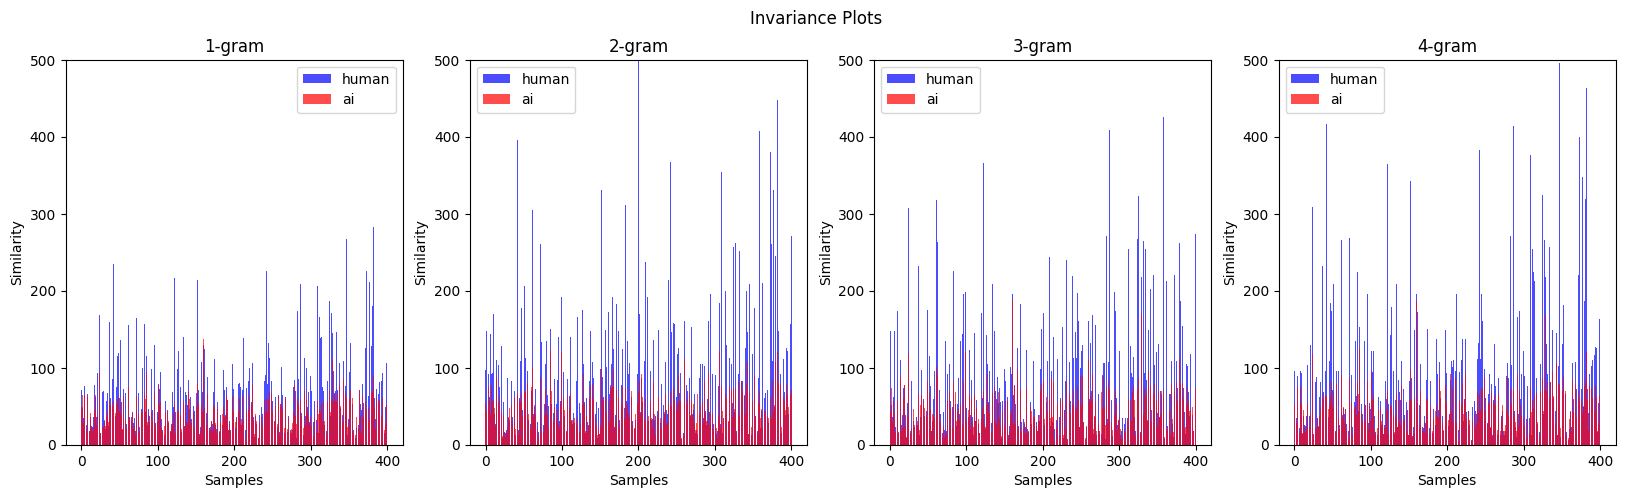

In [29]:
helper = PlotHelper(
    row=1, col=4, figsize=(20,5), title="Invariance Plots",
    plots=[
        PlotItem(ptype="bar", title="1-gram", xlabel="Samples", ylabel="Similarity", ylim=(0, 500),
                 y=[h_avgs[:, 0], m_avgs[:, 0]], x=[[_ for _ in range(len(h_avgs[:, 0]))], [_ for _ in range(len(m_avgs[:, 0]))]],
                 args=[{"color":"blue", "alpha":0.7, "label": "human"}, {"color":"red", "alpha":0.7, "label": "ai"},]
        ),
        PlotItem(ptype="bar", title="2-gram", xlabel="Samples", ylabel="Similarity", ylim=(0, 500),
                 y=[h_avgs[:, 1], m_avgs[:, 1]], x=[[_ for _ in range(len(h_avgs[:, 1]))], [_ for _ in range(len(m_avgs[:, 1]))]],
                 args=[{"color":"blue", "alpha":0.7, "label": "human"}, {"color":"red", "alpha":0.7, "label": "ai"},]
        ),
        PlotItem(ptype="bar", title="3-gram", xlabel="Samples", ylabel="Similarity", ylim=(0, 500),
                 y=[h_avgs[:, 2], m_avgs[:, 2]], x=[[_ for _ in range(len(h_avgs[:, 2]))], [_ for _ in range(len(m_avgs[:, 2]))]],
                 args=[{"color":"blue", "alpha":0.7, "label": "human"}, {"color":"red", "alpha":0.7, "label": "ai"},]
        ),
        PlotItem(ptype="bar", title="4-gram", xlabel="Samples", ylabel="Similarity", ylim=(0, 500),
                 y=[h_avgs[:, 3], m_avgs[:, 3]], x=[[_ for _ in range(len(h_avgs[:, 3]))], [_ for _ in range(len(m_avgs[:, 3]))]],
                 args=[{"color":"blue", "alpha":0.7, "label": "human"}, {"color":"red", "alpha":0.7, "label": "ai"},]
        ),
    ]
)


draws(helper)